# Task 1 - PREDICTION USING SUPERVISED ML


## By Gayatri Chandola

## OBJECTIVE

- Predict the percentage of an student based on the no. of study hours.
- What will be predicted score if a student studies for 9.25 hrs/ day?

## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## LOAD THE DATASET

In [2]:
# Reading the dataset
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Shape of dataset
data.shape

(25, 2)

It shows that there are 25 rows and 2 columns in this dataset

In [4]:
# First 5 rows of dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Last 5 rows of dataset
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
# Checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# Sum of null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

0 null values in both the columns

In [8]:
# Statistical analysis of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# Correlation between features
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## DATA VISUALIZATION

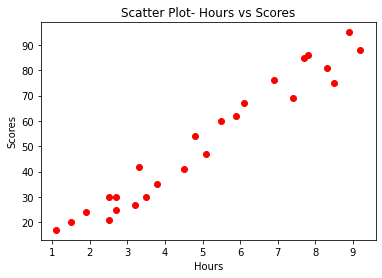

In [10]:
# Scatter Plot
x= data['Hours']
y= data['Scores']
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scatter Plot- Hours vs Scores')
plt.scatter(x,y,color="red")
plt.show()

It shows that percentage of student is increasing with the no. of study hours.

More the no. of study hours more will be the percentage of a student.

<AxesSubplot:>

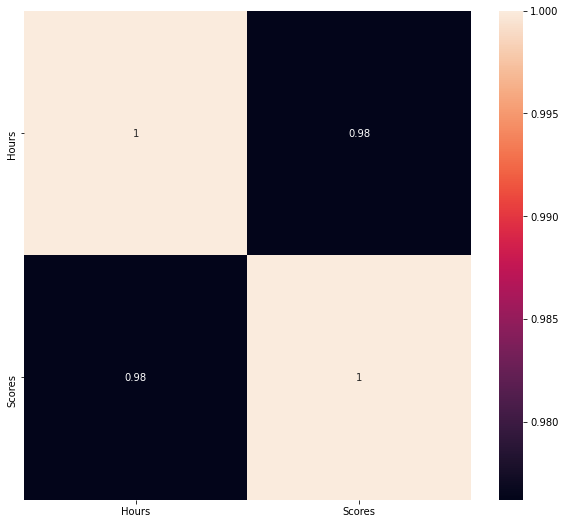

In [11]:
# Heatmap
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(),annot=True)

Study Hours and Scores are highly correlated to each other

## LINEAR REGRESSION MODEL

## Data Preparation

In [12]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [13]:
X= data.drop("Scores",axis=1)
y= data['Scores']

## Splitting the Data

Splitting the dataset into train and test data

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [15]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(17, 1) (8, 1) (17,) (8,)


## Training the Model

Training the data and fitting it into the model

In [16]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Regression Line

/home/rspl-laxmeechandola/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

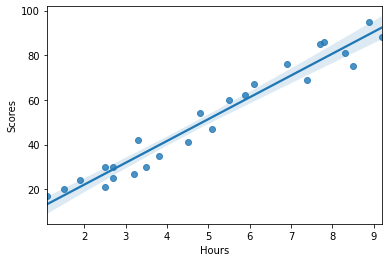

In [17]:
sns.regplot(data['Hours'],data['Scores'])

In [18]:
linreg.coef_

array([9.42402332])

In [19]:
linreg.intercept_

5.066228800726826

## Testing the Model

In [20]:
y_pred = linreg.predict(x_test)
y_pred

array([78.57361069, 40.87751741, 53.12874773, 56.89835706, 22.97187311,
       30.51109176, 47.47433374, 38.05031042])

## Comparing the Actual and Predicted values

In [21]:
result = pd.DataFrame({"Actual_marks":y_test,"Predicted_marks":y_pred})
result

,Actual_marks,Predicted_marks
24,86,78.573611
22,35,40.877517
1,47,53.128748
7,60,56.898357
17,24,22.971873
9,25,30.511092
12,41,47.474334
4,30,38.050310


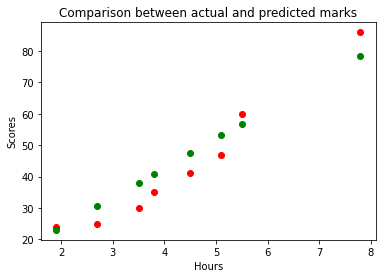

In [22]:
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Comparison between actual and predicted marks')
plt.scatter(x_test,y_test,color='red')
plt.scatter(x_test,y_pred,color='green')
plt.show()

## Score prediction for Hours Studied= 9.25 hours/day

In [23]:
hours= [9.25]
score= linreg.predict([hours])
print(score)

[92.2384445]


According to Linear Regression model, predicted score if a student studies for 9.25 hrs/ day is 92.2384445

## Model Evaluation

In [24]:
# Mean Square Error
from sklearn.metrics import mean_squared_error                 
mean_squared_error(y_test,y_pred)

34.37898491048979

In [25]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

5.449770025741973

In [26]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9105296423929999

## Thank You